In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Surgical

In [7]:
data = """
/	map	map	map	bdry	bdry	bdry	iou	iou	iou	dice	dice	dice
/	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu
017_e24_raw	0.914141414	0.280332149	0.009961169	0.266633339	0.280332149	0.009961169	0.651799143	0.280332149	0.009961169	0.756930766	0.280332149	0.009961169
018_e24_norm_max	0.928030303	0.258601039	0.009188988	0.273413602	0.258601039	0.009188988	0.663881571	0.258601039	0.009188988	0.770007519	0.258601039	0.009188988
028_e24_norm_roi	0.919191919	0.272712374	0.009690412	0.271588606	0.272712374	0.009690412	0.65941556	0.272712374	0.009690412	0.764050005	0.272712374	0.009690412
015_e100_raw	0.944444444	0.22920617	0.008144487	0.285981935	0.22920617	0.008144487	0.688004709	0.22920617	0.008144487	0.79263809	0.22920617	0.008144487
016_e100_norm_max	0.931818182	0.252216926	0.008962138	0.277130676	0.252216926	0.008962138	0.673256548	0.252216926	0.008962138	0.77832132	0.252216926	0.008962138
027_e100_norm_roi	0.945707071	0.226737996	0.008056784	0.286600049	0.226737996	0.008056784	0.685764107	0.226737996	0.008056784	0.79151052	0.226737996	0.008056784
019_e120_raw	0.934343434	0.247837317	0.008806516	0.274832901	0.247837317	0.008806516	0.669895295	0.247837317	0.008806516	0.776630482	0.247837317	0.008806516
020_e120_norm_max	0.926767677	0.26068209	0.009262935	0.27379901	0.26068209	0.009262935	0.667749456	0.26068209	0.009262935	0.772552954	0.26068209	0.009262935
029_e120_norm_roi	0.938131313	0.241069138	0.008566019	0.276376284	0.241069138	0.008566019	0.674120288	0.241069138	0.008566019	0.780746952	0.241069138	0.008566019
033_e120_bry	0.940656566	0.236415656	0.008400665	0.282932078	0.236415656	0.008400665	0.680507333	0.236415656	0.008400665	0.786261534	0.236415656	0.008400665
033_e120_bdy	0.940656566	0.236415656	0.008400665	0.282932078	0.236415656	0.008400665	0.680507333	0.236415656	0.008400665	0.786261534	0.236415656	0.008400665
033_e120_bdry	0.940656566	0.236415656	0.008400665	0.282932078	0.236415656	0.008400665	0.680507333	0.236415656	0.008400665	0.786261534	0.236415656	0.008400665



"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df

/                       map                          bdry                      \
/                        mu       std  delta_mu        mu       std  delta_mu   
017_e24_raw        0.914141  0.280332  0.009961  0.266633  0.280332  0.009961   
018_e24_norm_max   0.928030  0.258601  0.009189  0.273414  0.258601  0.009189   
028_e24_norm_roi   0.919192  0.272712  0.009690  0.271589  0.272712  0.009690   
015_e100_raw       0.944444  0.229206  0.008144  0.285982  0.229206  0.008144   
016_e100_norm_max  0.931818  0.252217  0.008962  0.277131  0.252217  0.008962   
027_e100_norm_roi  0.945707  0.226738  0.008057  0.286600  0.226738  0.008057   
019_e120_raw       0.934343  0.247837  0.008807  0.274833  0.247837  0.008807   
020_e120_norm_max  0.926768  0.260682  0.009263  0.273799  0.260682  0.009263   
029_e120_norm_roi  0.938131  0.241069  0.008566  0.276376  0.241069  0.008566   
033_e120_bry       0.940657  0.236416  0.008401  0.282932  0.236416  0.008401   
033_e120_bdy       0.940657  0.236416  0.008401  0.282932  0.236416  0.008401   
033_e120_bdry      0.940657  0.236416  0.008401  0.282932  0.236416  0.008401   

/                       iou                          dice                      
/                        mu       std  delta_mu        mu       std  delta_mu  
017_e24_raw        0.651799  0.280332  0.009961  0.756931  0.280332  0.009961  
018_e24_norm_max   0.663882  0.258601  0.009189  0.770008  0.258601  0.009189  
028_e24_norm_roi   0.659416  0.272712  0.009690  0.764050  0.272712  0.009690  
015_e100_raw       0.688005  0.229206  0.008144  0.792638  0.229206  0.008144  
016_e100_norm_max  0.673257  0.252217  0.008962  0.778321  0.252217  0.008962  
027_e100_norm_roi  0.685764  0.226738  0.008057  0.791511  0.226738  0.008057  
019_e120_raw       0.669895  0.247837  0.008807  0.776630  0.247837  0.008807  
020_e120_norm_max  0.667749  0.260682  0.009263  0.772553  0.260682  0.009263  
029_e120_norm_roi  0.674120  0.241069  0.008566  0.780747  0.241069  0.008566  
033_e120_bry       0.680507  0.236416  0.008401  0.786262  0.236416  0.008401  
033_e120_bdy       0.680507  0.236416  0.008401  0.786262  0.236416  0.008401  
033_e120_bdry      0.680507  0.236416  0.008401  0.786262  0.236416  0.008401

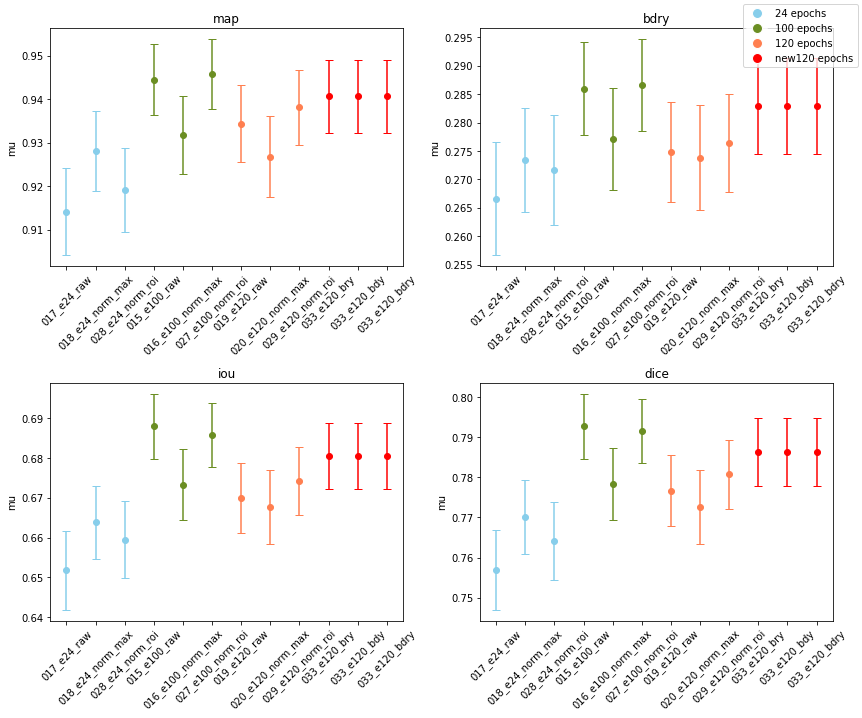

In [8]:
# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define categories
categories = ["map", "bdry", "iou", "dice"]

# Define colors and labels
colors = ['skyblue', 'olivedrab', 'coral', 'red']
labels = ['24 epochs', '100 epochs', '120 epochs', 'new120 epochs']

# Prepare legend elements manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                   for c in colors]

# Loop over categories
for ax, category in zip(axs.flatten(), categories):
    ax.set_title(category)
    ax.set_ylabel('mu')
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)

    model_names = df.index

    for i in range(0, len(model_names), 3):
        ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
                    yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
                    fmt='o', capsize=4, color=colors[i//3])

# Create a global legend
fig.legend(legend_elements, labels, loc='upper right')

plt.tight_layout()
plt.show()

## train set

In [9]:
data = """
/	map	map	map	bdry	bdry	bdry	iou	iou	iou	dice	dice	dice
/	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu
017_e24_raw	0.95	0.21816322	0.009756556	0.30162565	0.21816322	0.009756556	0.696214513	0.21816322	0.009756556	0.799757814	0.21816322	0.009756556
018_e24_norm_max	0.968	0.176176264	0.007878842	0.307678793	0.176176264	0.007878842	0.70790497	0.176176264	0.007878842	0.813641345	0.176176264	0.007878842
028_e24_norm_roi	0.956	0.205300503	0.009181318	0.306289303	0.205300503	0.009181318	0.701702745	0.205300503	0.009181318	0.805355026	0.205300503	0.009181318
015_e100_raw	0.996	0.063182149	0.002825592	0.3524371	0.063182149	0.002825592	0.785164648	0.063182149	0.002825592	0.875953279	0.063182149	0.002825592
016_e100_norm_max	0.998	0.04472136	0.002	0.350063137	0.04472136	0.002	0.781434294	0.04472136	0.002	0.874325424	0.04472136	0.002
027_e100_norm_roi	0.993	0.080398556	0.003595533	0.353159241	0.080398556	0.003595533	0.785086741	0.080398556	0.003595533	0.875060803	0.080398556	0.003595533
019_e120_raw	0.99	0.099598392	0.004454175	0.324853076	0.099598392	0.004454175	0.749341314	0.099598392	0.004454175	0.849647008	0.099598392	0.004454175
020_e120_norm_max	0.992	0.089173448	0.003987958	0.327226137	0.089173448	0.003987958	0.754620061	0.089173448	0.003987958	0.853983698	0.089173448	0.003987958
029_e120_norm_roi	0.992	0.089173448	0.003987958	0.325466863	0.089173448	0.003987958	0.7498596	0.089173448	0.003987958	0.850705657	0.089173448	0.003987958
033_e120_bdy	0.996	0.063182149	0.002825592	0.351813178	0.063182149	0.002825592	0.784937002	0.063182149	0.002825592	0.875588037	0.063182149	0.002825592
033_e120_bry	0.996	0.063182149	0.002825592	0.351813178	0.063182149	0.002825592	0.784937002	0.063182149	0.002825592	0.875588037	0.063182149	0.002825592
033_e120_bdry	0.996	0.063182149	0.002825592	0.351813178	0.063182149	0.002825592	0.784937002	0.063182149	0.002825592	0.875588037	0.063182149	0.002825592



"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df

/                    map                          bdry                      \
/                     mu       std  delta_mu        mu       std  delta_mu   
017_e24_raw        0.950  0.218163  0.009757  0.301626  0.218163  0.009757   
018_e24_norm_max   0.968  0.176176  0.007879  0.307679  0.176176  0.007879   
028_e24_norm_roi   0.956  0.205301  0.009181  0.306289  0.205301  0.009181   
015_e100_raw       0.996  0.063182  0.002826  0.352437  0.063182  0.002826   
016_e100_norm_max  0.998  0.044721  0.002000  0.350063  0.044721  0.002000   
027_e100_norm_roi  0.993  0.080399  0.003596  0.353159  0.080399  0.003596   
019_e120_raw       0.990  0.099598  0.004454  0.324853  0.099598  0.004454   
020_e120_norm_max  0.992  0.089173  0.003988  0.327226  0.089173  0.003988   
029_e120_norm_roi  0.992  0.089173  0.003988  0.325467  0.089173  0.003988   
033_e120_bdy       0.996  0.063182  0.002826  0.351813  0.063182  0.002826   
033_e120_bry       0.996  0.063182  0.002826  0.351813  0.063182  0.002826   
033_e120_bdry      0.996  0.063182  0.002826  0.351813  0.063182  0.002826   

/                       iou                          dice                      
/                        mu       std  delta_mu        mu       std  delta_mu  
017_e24_raw        0.696215  0.218163  0.009757  0.799758  0.218163  0.009757  
018_e24_norm_max   0.707905  0.176176  0.007879  0.813641  0.176176  0.007879  
028_e24_norm_roi   0.701703  0.205301  0.009181  0.805355  0.205301  0.009181  
015_e100_raw       0.785165  0.063182  0.002826  0.875953  0.063182  0.002826  
016_e100_norm_max  0.781434  0.044721  0.002000  0.874325  0.044721  0.002000  
027_e100_norm_roi  0.785087  0.080399  0.003596  0.875061  0.080399  0.003596  
019_e120_raw       0.749341  0.099598  0.004454  0.849647  0.099598  0.004454  
020_e120_norm_max  0.754620  0.089173  0.003988  0.853984  0.089173  0.003988  
029_e120_norm_roi  0.749860  0.089173  0.003988  0.850706  0.089173  0.003988  
033_e120_bdy       0.784937  0.063182  0.002826  0.875588  0.063182  0.002826  
033_e120_bry       0.784937  0.063182  0.002826  0.875588  0.063182  0.002826  
033_e120_bdry      0.784937  0.063182  0.002826  0.875588  0.063182  0.002826

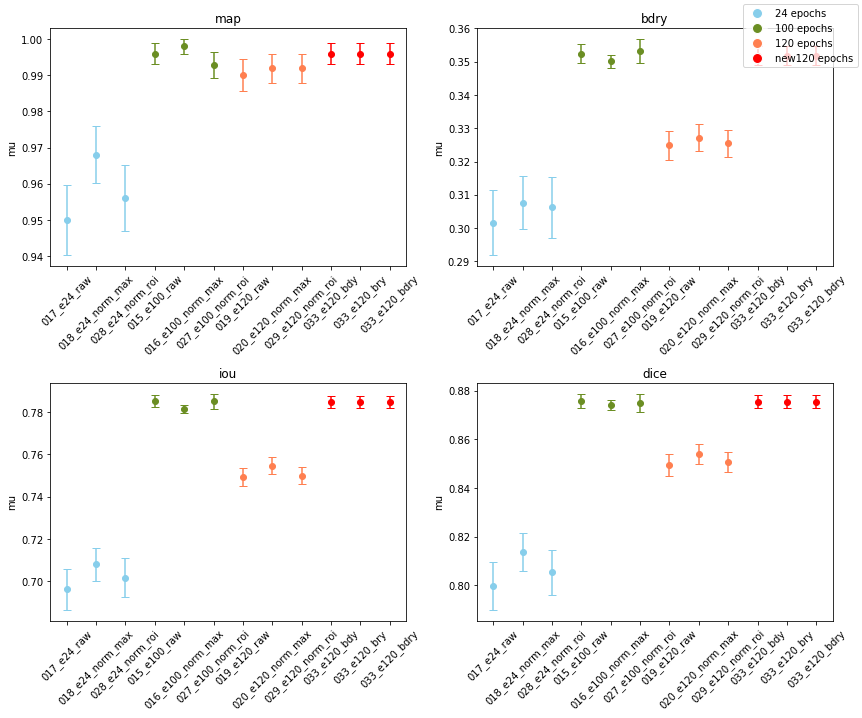

In [10]:
# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define categories
categories = ["map", "bdry", "iou", "dice"]

# Define colors and labels
colors = ['skyblue', 'olivedrab', 'coral', 'red']
labels = ['24 epochs', '100 epochs', '120 epochs', 'new120 epochs']

# Prepare legend elements manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                   for c in colors]

# Loop over categories
for ax, category in zip(axs.flatten(), categories):
    ax.set_title(category)
    ax.set_ylabel('mu')
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)

    model_names = df.index

    for i in range(0, len(model_names), 3):
        ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
                    yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
                    fmt='o', capsize=4, color=colors[i//3])

# Create a global legend
fig.legend(legend_elements, labels, loc='upper right')

plt.tight_layout()
plt.show()

# Occlusion

## test set

In [13]:
data = """
/	map	map	map	bdry	bdry	bdry	iou	iou	iou	dice	dice	dice
/	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu
023_e24_raw	0.820833334	0.295713681	0.046756438	0.57830339	0.295713681	0.038498642	0.686914346	0.295713681	0.038498642	0.719699541	0.295713681	0.038498642
024_e24_norm_max	0.827083334	0.280152774	0.044296043	0.561667554	0.280152774	0.036472785	0.69889554	0.280152774	0.036472785	0.730423839	0.280152774	0.036472785
031_e24_norm_roi	0.870833334	0.227983542	0.036047363	0.528259244	0.227983542	0.029680929	0.733013378	0.227983542	0.029680929	0.769681588	0.227983542	0.029680929
021_e100_raw	0.870833334	0.227983542	0.036047363	0.625396588	0.227983542	0.029680929	0.730953018	0.227983542	0.029680929	0.768943344	0.227983542	0.029680929
022_e100_norm_max	0.858333334	0.260259567	0.041150651	0.538157479	0.260259567	0.03388291	0.720580037	0.260259567	0.03388291	0.754994297	0.260259567	0.03388291
030_e100_norm_roi	0.858333334	0.260259567	0.041150651	0.519515805	0.260259567	0.03388291	0.718977856	0.260259567	0.03388291	0.754590515	0.260259567	0.03388291
025_e120_raw	0.858333334	0.260259567	0.041150651	0.595702454	0.260259567	0.03388291	0.715519975	0.260259567	0.03388291	0.753082228	0.260259567	0.03388291
026_e120_norm_max	0.845833334	0.265240577	0.041938218	0.547203783	0.265240577	0.034531382	0.700386224	0.265240577	0.034531382	0.737043915	0.265240577	0.034531382
032_e120_norm_roi	0.858333334	0.260259567	0.041150651	0.529984994	0.260259567	0.03388291	0.712303737	0.260259567	0.03388291	0.750534527	0.260259567	0.03388291
034_e120new_nom_roi	0.845833334	0.265240577	0.041938218	0.59535021	0.265240577	0.034531382	0.697764799	0.265240577	0.034531382	0.735194518	0.265240577	0.034531382
034_e120new_nor_roi	0.845833334	0.265240577	0.041938218	0.59535021	0.265240577	0.034531382	0.697764799	0.265240577	0.034531382	0.735194518	0.265240577	0.034531382
034_e120new_norm_roi	0.845833334	0.265240577	0.041938218	0.59535021	0.265240577	0.034531382	0.697764799	0.265240577	0.034531382	0.735194518	0.265240577	0.034531382

"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df

/                          map                          bdry            \
/                           mu       std  delta_mu        mu       std   
023_e24_raw           0.820833  0.295714  0.046756  0.578303  0.295714   
024_e24_norm_max      0.827083  0.280153  0.044296  0.561668  0.280153   
031_e24_norm_roi      0.870833  0.227984  0.036047  0.528259  0.227984   
021_e100_raw          0.870833  0.227984  0.036047  0.625397  0.227984   
022_e100_norm_max     0.858333  0.260260  0.041151  0.538157  0.260260   
030_e100_norm_roi     0.858333  0.260260  0.041151  0.519516  0.260260   
025_e120_raw          0.858333  0.260260  0.041151  0.595702  0.260260   
026_e120_norm_max     0.845833  0.265241  0.041938  0.547204  0.265241   
032_e120_norm_roi     0.858333  0.260260  0.041151  0.529985  0.260260   
034_e120new_nom_roi   0.845833  0.265241  0.041938  0.595350  0.265241   
034_e120new_nor_roi   0.845833  0.265241  0.041938  0.595350  0.265241   
034_e120new_norm_roi  0.845833  0.265241  0.041938  0.595350  0.265241   

/                                    iou                          dice  \
/                     delta_mu        mu       std  delta_mu        mu   
023_e24_raw           0.038499  0.686914  0.295714  0.038499  0.719700   
024_e24_norm_max      0.036473  0.698896  0.280153  0.036473  0.730424   
031_e24_norm_roi      0.029681  0.733013  0.227984  0.029681  0.769682   
021_e100_raw          0.029681  0.730953  0.227984  0.029681  0.768943   
022_e100_norm_max     0.033883  0.720580  0.260260  0.033883  0.754994   
030_e100_norm_roi     0.033883  0.718978  0.260260  0.033883  0.754591   
025_e120_raw          0.033883  0.715520  0.260260  0.033883  0.753082   
026_e120_norm_max     0.034531  0.700386  0.265241  0.034531  0.737044   
032_e120_norm_roi     0.033883  0.712304  0.260260  0.033883  0.750535   
034_e120new_nom_roi   0.034531  0.697765  0.265241  0.034531  0.735195   
034_e120new_nor_roi   0.034531  0.697765  0.265241  0.034531  0.735195   
034_e120new_norm_roi  0.034531  0.697765  0.265241  0.034531  0.735195   

/                                         
/                          std  delta_mu  
023_e24_raw           0.295714  0.038499  
024_e24_norm_max      0.280153  0.036473  
031_e24_norm_roi      0.227984  0.029681  
021_e100_raw          0.227984  0.029681  
022_e100_norm_max     0.260260  0.033883  
030_e100_norm_roi     0.260260  0.033883  
025_e120_raw          0.260260  0.033883  
026_e120_norm_max     0.265241  0.034531  
032_e120_norm_roi     0.260260  0.033883  
034_e120new_nom_roi   0.265241  0.034531  
034_e120new_nor_roi   0.265241  0.034531  
034_e120new_norm_roi  0.265241  0.034531

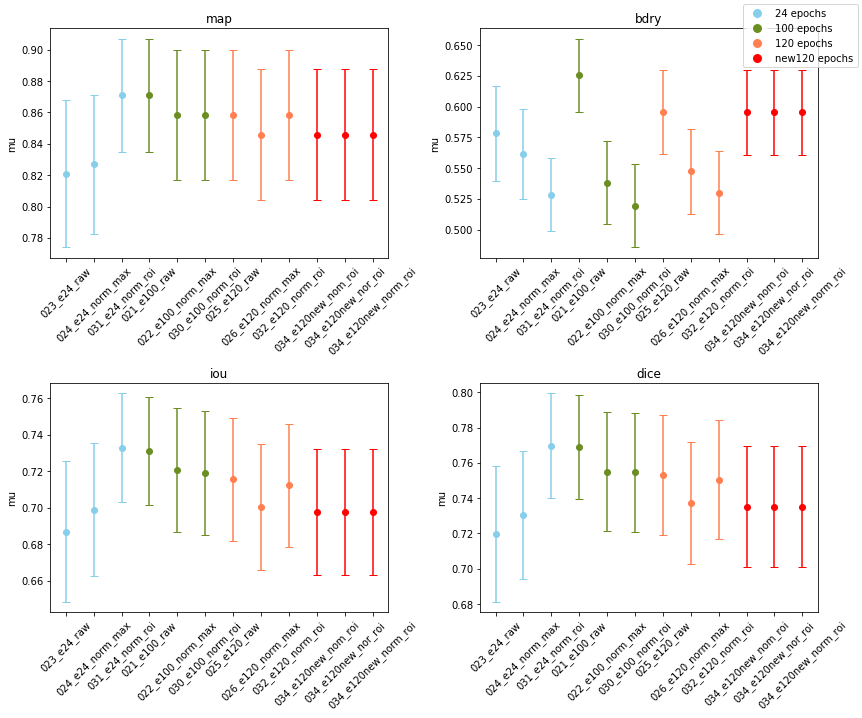

In [14]:
# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define categories
categories = ["map", "bdry", "iou", "dice"]

# Define colors and labels
colors = ['skyblue', 'olivedrab', 'coral', 'red']
labels = ['24 epochs', '100 epochs', '120 epochs', 'new120 epochs']

# Prepare legend elements manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                   for c in colors]

# Loop over categories
for ax, category in zip(axs.flatten(), categories):
    ax.set_title(category)
    ax.set_ylabel('mu')
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)

    model_names = df.index

    for i in range(0, len(model_names), 3):
        ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
                    yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
                    fmt='o', capsize=4, color=colors[i//3])

# Create a global legend
fig.legend(legend_elements, labels, loc='upper right')

plt.tight_layout()
plt.show()

## train set

In [62]:
data = """
/	map	map	map	bdry	bdry	bdry	iou	iou	iou	dice	dice	dice
/	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu
023_e24_raw	0.885162602	0.257420565	0.016412536	0.625801363	0.257420565	0.013799191	0.756187582	0.257420565	0.013799191	0.795592739	0.257420565	0.013799191
024_e24_norm_max	0.873644987	0.260572094	0.01661347	0.543682491	0.260572094	0.01396813	0.737862744	0.260572094	0.01396813	0.777465247	0.260572094	0.01396813
031_e24_norm_roi	0.888550136	0.241933112	0.015425092	0.507953676	0.241933112	0.012968976	0.752504399	0.241933112	0.012968976	0.791966456	0.241933112	0.012968976
021_e100_raw	0.884485095	0.260402238	0.01660264	0.625197353	0.260402238	0.013959025	0.750954035	0.260402238	0.013959025	0.791203686	0.260402238	0.013959025
022_e100_norm_max	0.900745258	0.234497842	0.014951036	0.565162233	0.234497842	0.012570404	0.764109134	0.234497842	0.012570404	0.806221866	0.234497842	0.012570404
030_e100_norm_roi	0.895663957	0.243182204	0.015504731	0.522305415	0.243182204	0.013035934	0.762568251	0.243182204	0.013035934	0.804191125	0.243182204	0.013035934
025_e120_raw	0.886178862	0.243106383	0.015499897	0.618448516	0.243106383	0.01303187	0.744095771	0.243106383	0.01303187	0.784995026	0.243106383	0.01303187
026_e120_norm_max	0.884146342	0.244238403	0.015572072	0.541236929	0.244238403	0.013092553	0.743094616	0.244238403	0.013092553	0.783148372	0.244238403	0.013092553
032_e120_norm_roi	0.893292683	0.239143308	0.01524722	0.538061714	0.239143308	0.012819427	0.752198686	0.239143308	0.012819427	0.793343141	0.239143308	0.012819427

"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df

/                       map                          bdry                      \
/                        mu       std  delta_mu        mu       std  delta_mu   
023_e24_raw        0.885163  0.257421  0.016413  0.625801  0.257421  0.013799   
024_e24_norm_max   0.873645  0.260572  0.016613  0.543682  0.260572  0.013968   
031_e24_norm_roi   0.888550  0.241933  0.015425  0.507954  0.241933  0.012969   
021_e100_raw       0.884485  0.260402  0.016603  0.625197  0.260402  0.013959   
022_e100_norm_max  0.900745  0.234498  0.014951  0.565162  0.234498  0.012570   
030_e100_norm_roi  0.895664  0.243182  0.015505  0.522305  0.243182  0.013036   
025_e120_raw       0.886179  0.243106  0.015500  0.618449  0.243106  0.013032   
026_e120_norm_max  0.884146  0.244238  0.015572  0.541237  0.244238  0.013093   
032_e120_norm_roi  0.893293  0.239143  0.015247  0.538062  0.239143  0.012819   

/                       iou                          dice                      
/                        mu       std  delta_mu        mu       std  delta_mu  
023_e24_raw        0.756188  0.257421  0.013799  0.795593  0.257421  0.013799  
024_e24_norm_max   0.737863  0.260572  0.013968  0.777465  0.260572  0.013968  
031_e24_norm_roi   0.752504  0.241933  0.012969  0.791966  0.241933  0.012969  
021_e100_raw       0.750954  0.260402  0.013959  0.791204  0.260402  0.013959  
022_e100_norm_max  0.764109  0.234498  0.012570  0.806222  0.234498  0.012570  
030_e100_norm_roi  0.762568  0.243182  0.013036  0.804191  0.243182  0.013036  
025_e120_raw       0.744096  0.243106  0.013032  0.784995  0.243106  0.013032  
026_e120_norm_max  0.743095  0.244238  0.013093  0.783148  0.244238  0.013093  
032_e120_norm_roi  0.752199  0.239143  0.012819  0.793343  0.239143  0.012819

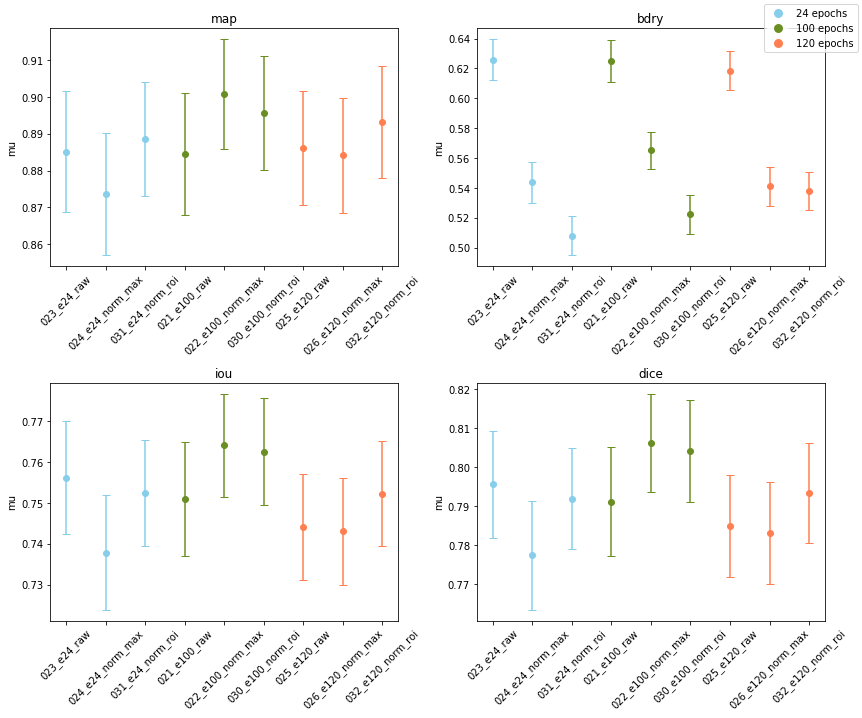

In [63]:
# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define categories
categories = ["map", "bdry", "iou", "dice"]

# Define colors and labels
colors = ['skyblue', 'olivedrab', 'coral', 'red']
labels = ['24 epochs', '100 epochs', '120 epochs', 'new120 epochs']

# Prepare legend elements manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                   for c in colors]

# Loop over categories
for ax, category in zip(axs.flatten(), categories):
    ax.set_title(category)
    ax.set_ylabel('mu')
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)

    model_names = df.index

    for i in range(0, len(model_names), 3):
        ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
                    yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
                    fmt='o', capsize=4, color=colors[i//3])

# Create a global legend
fig.legend(legend_elements, labels, loc='upper right')

plt.tight_layout()
plt.show()